# House Prices

Predict the price of a house based on various features such as street alley & sale condition. 

## Loading the libraries and Reading Data

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# location paths to the dataset
train = ("../Data/House_Prices/train.csv")
test = ("../Data/House_Prices/test.csv")

In [5]:
# reading the data as a dataframe 
train_df = pd.read_csv(train,index_col = 0)
test_df = pd.read_csv(test, index_col = 0)

In [6]:
# first columns of the train_df dataframe
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# first columns of the test_df dataframe
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# the shape of the data frames
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

In [9]:
# columns on the train dataframe
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Data Cleaning 

Involves:
   - checking for missing values and how to handle them
   - investigating the presence of duplicate rows on the dataframe
   - locating outliers if present in the dataframe 

In [10]:
# Missing values
# identify the missing values in the train_df Dataframe
#
miss = train_df.isnull().sum().sort_values(ascending = False)
# the percentage of missing value 
#
percentage = (train_df.isnull().sum() / len(train_df)).sort_values(ascending = False)
# storing total missing value aganist percentage in a Dataframe
#
missing_data = pd.DataFrame({'Total': miss, 'Percentage': percentage})
# if the percentage is 0, indicates no missing values hence removed
# 
missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
# diplaying the dataframe with the missing value
#
missing_data

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


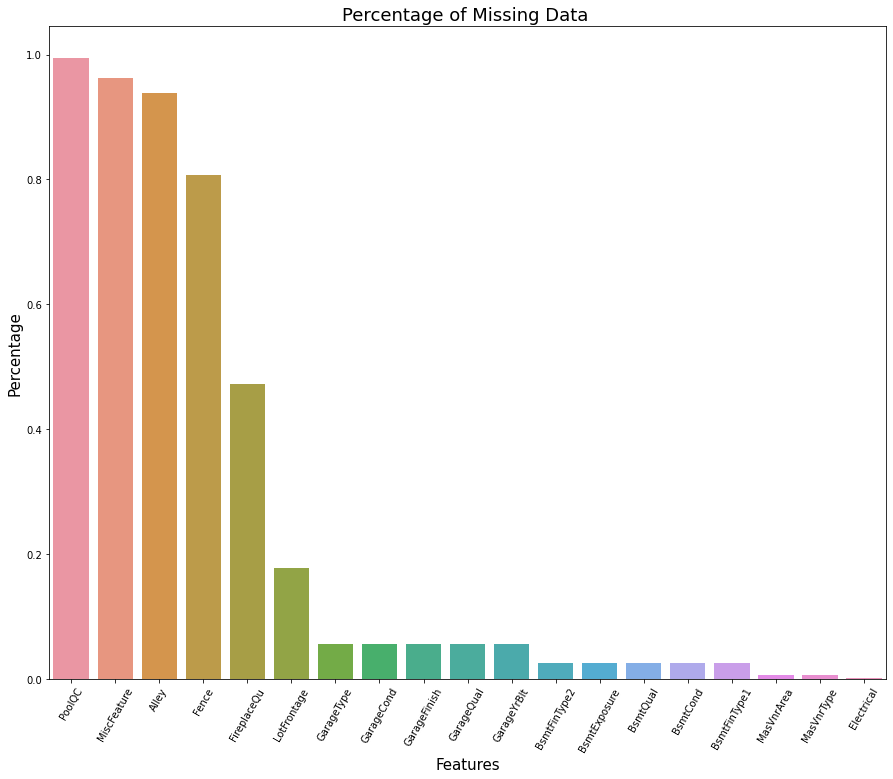

In [11]:
# graphical representation of missing data
#
fig, axes = plt.subplots(figsize=(15, 12))
sns.barplot(x = missing_data.index, y = missing_data.Percentage)
# labeling the x-axis
plt.xlabel('Features', fontsize = 15)
# rotating the name of the columns to fit on the x-axis
plt.xticks(rotation='60')
# labeling the y-axis
plt.ylabel('Percentage', fontsize = 15)
# title of the plot
plt.title('Percentage of Missing Data ', fontsize = 18)
# display th plot
plt.show()

* Pool quality `PoolQC`, Miscellaneous feature not covered in other categories `MiscFeature`, Type of alley access to property `Alley` & Fence quality `Fence` recorded highest number of missing values. Basing on the percentage of the missing values, thats a lot of missing values. Electrical system `Electrical`, Masonry veneer type `MasVnrType` & Masonry veneer area in square feet `MasVnrArea` recorded the least percentage of missing values.
* Basing on the high percentage of missing data in some columns, its best to understand if this features are really important in determing the price of a house. Incase, the missing values are due to the column not being important in determing the price of the house then best be dropped.

- **PoolQC**: This feature represents the quality of the pool. According to the data decription, the pool quality can be Excellent,Good, Average/Typical, Fair or No Pool. No pool is represented by 'na' which explains the high number of missing values(99.521%). Meaning a majority of the houses don't have a pool.

In [12]:
# replacing the missing values with None to show the houses don't have a pool
train_df['PoolQC'] = train_df['PoolQC'].fillna('None')

- **MiscFeature**: This feature represents Miscellaneous feature not covered in other categories. The Miscellaneous feature can be an Elevator, 2nd Garage (if not described in garage section), Other, Shed (over 100 SF), Tennis Court or None. No Miscellaneous Feature is represeneted by 'na' explaining the high percentage of missing values(96.3014%). Majority of the houses don't have a Miscellaneous Feature.

In [13]:
# replacing the missing values with none to show the houses don't have a miscellaneous feature
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')

- **Alley**: This feature represents the type of alley to property. The type of alley can be Gravel, paved or no alley access. 'NA' represents No valley access

In [16]:
# replacing the missing values in alley column with None 
train_df['Alley'] = train_df['Alley'].fillna('None')

- **Fence**: This represents the fence quality. The fence quality from the description can be Good Privacy, Minimum Privacy, Good Wood, Minimum Wood/Wire or No Fence. No fence is represented by 'Na' hence the high percentage of missing values.

In [17]:
# replacing missing values in Fence with None
train_df['Fence'] = train_df['Fence'].fillna('None')

- **FireplaceQu**, **GarageType**, **GarageCond**, **GarageFinish** & **GarageQual** contain missing values that represents the lack of the feature in the house.

In [18]:
# selecting the columns
missing_cols = ['FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish','GarageQual']
# using a for loop to replace the missing value 
for missing_col in missing_cols:
    train_df[missing_col].fillna('None', inplace= True)

- **GarageYrBlt**: This feature will not have missing values if the house has no garage.  

In [33]:
# replacing missing values with 0
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

- **BsmtFinType2**, **BsmtExposure**, **BsmtQual**, **BsmtCond** & **BsmtFinType1** are features related to basement. 'na' values in this features means the house has no basement.

In [39]:
# columns related to basement
basement_cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

# replacing missing values
for basement_col in basement_cols:
    train_df[basement_col].fillna('None', inplace= True)